# How it works:
- Refference: https://www.blopig.com/blog/2023/03/brics-decomposition-and-synthetic-accessibility/
- uses different rules to break bonds
- rules based on specific type of chemical reaction(hydrolysis, reduction, alkylation etc)
- Each rule assigns a symbol to the broken bond( [1*], [5*], [16*] etc) that is used to indicate what kind of atoms and bonds can be used to reconnect the fragments.

In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
import pathlib
import pandas as pd
from rdkit.Chem import PandasTools

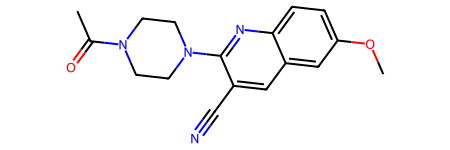

In [19]:
m1 = Chem.MolFromSmiles('n1c(N3CCN(C(=O)C)CC3)c(C#N)cc2cc(OC)ccc12')
m1

In [20]:
# fragmentation according to stereochemistry rules 
pieces = BRICS.BRICSDecompose(m1)
pieces

{'[1*]C(C)=O', '[14*]c1nc2ccc([16*])cc2cc1C#N', '[3*]OC', '[5*]N1CCN([5*])CC1'}

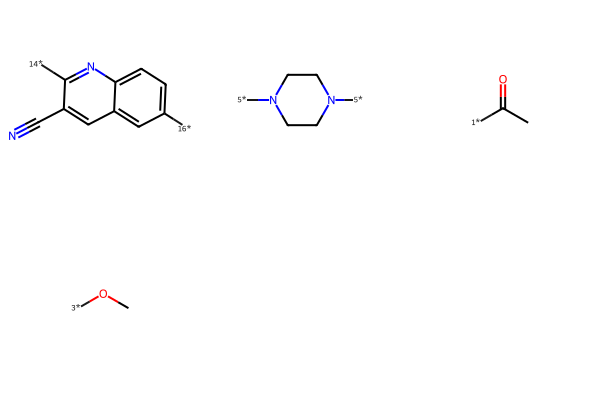

In [21]:
# draw
fragmented=BRICS.BreakBRICSBonds(m1)
pieces=Chem.GetMolFrags(fragmented,asMols=True)
Draw.MolsToGridImage(pieces)

# Modulerization for app:

In [22]:
path = 'C://Users//jadh8858//Desktop//flc//All Properties with Finguprints_3.csv'
df = pd.read_csv(path)


In [24]:

# main
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem.Draw import MolsToGridImage


# SMILES col
smiles_column = 'Smiles'
smiles = df[smiles_column]

# target col
target_column = "Fluorescent labeling"  
print(f"Categories: {df[target_column].value_counts()}")

# no. of categories
categories = df[target_column].nunique()

# list to store frag. analysis
fragment_analysis = []

# for each category
for category in df[target_column].unique():
    category_df = df[df[target_column] == category]
    category_smiles = category_df[smiles_column]

    # dict for each col
    category_results = {
        'CATEGORY': category,
        'FRAGMENTS': [],
        'FREQUENCY': [],
    }

    # calc fragments using BRICS
    all_frags = []
    for smiles_string in category_smiles:
        mol = Chem.MolFromSmiles(smiles_string)
        if mol is not None:
            fragments = BRICS.BRICSDecompose(mol)
            all_frags.extend(fragments)

    # calc frequency of each fragment in that category
    fragment_counts = pd.Series(all_frags).value_counts().reset_index()
    fragment_counts.columns = ['FRAGMENTS', 'FREQUENCY']

    # Calc % of occurance
    total_mols = len(category_smiles)

    # Store results for this category
    category_results['FRAGMENTS'] = fragment_counts['FRAGMENTS']
    category_results['FREQUENCY'] = fragment_counts['FREQUENCY']

    # Append to list
    fragment_analysis.append(category_results)
    
# Generate df
divided_df = pd.concat([pd.DataFrame(category_results) for category_results in fragment_analysis], ignore_index=True)

# insert str column
# PandasTools.AddMoleculeColumnToFrame(divided_df, smilesCol='FRAGMENTS')

# Get categories
categories = divided_df['CATEGORY'].unique()

#  separate df for each category
category_dfs = {}
for category in categories:
    category_dfs[category] = divided_df[divided_df['CATEGORY'] == category]

print("sucessfully completed...")

Categories: Fluorescent labeling
No     16400
Yes    15903
Name: count, dtype: int64
sucessfully completed...


In [30]:
# df for each category
for category, category_df in category_dfs.items():
    category_df.to_csv(f"BRICS_category_{category}.csv")
    print(f"DataFrame for Category saved: {category}")


DataFrame for Category saved: Yes
DataFrame for Category saved: No 


In [27]:
# cate
category_dfs["Yes"].head(10)

,CATEGORY,FRAGMENTS,FREQUENCY
0,Yes,[16*]c1ccc([16*])cc1,3954
1,Yes,[16*]c1ccccc1,3224
2,Yes,[7*]C[8*],3101
3,Yes,[3*]OC,2925
4,Yes,[5*]N(C)C,1965
5,Yes,[5*]N([5*])[5*],1701
6,Yes,[3*]O[3*],1661
7,Yes,[4*]CC,1144
8,Yes,[5*]N[5*],1042
9,Yes,[1*]C([6*])=O,719


In [28]:
category_dfs["No "].head(10)

,CATEGORY,FRAGMENTS,FREQUENCY
3692,No,[1*]C([6*])=O,8642
3693,No,[5*]N[5*],8632
3694,No,[4*]C[8*],4423
3695,No,[16*]c1ccccc1,3458
3696,No,[3*]OC,2546
3697,No,[5*]N1CCN([5*])CC1,2064
3698,No,[16*]c1ccc([16*])cc1,1816
3699,No,[8*]C[8*],1636
3700,No,[5*]N1CCC([15*])CC1,1578
3701,No,[3*]O[3*],1505
